<a href="https://colab.research.google.com/github/RitreshGirdhar/compare-bert-vs-roberta/blob/master/Copy_of_compare_text_classification_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Install libraries**

In [1]:
!pip install tensorflow

In [2]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 41.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 78.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 28.9 MB/s eta 0:00:00


In [3]:
!pip install --upgrade numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 27.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cupy-cuda11x 11.0.0 requires numpy<1.26,>=1.20, but you have numpy 1.26.0 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.26.0 which is incompatible.
tensorflow 2.13.0 requires numpy<=1.24.3,>=1.22, but you have numpy 1.26.0 which is incompatible.


**Import Libraries**

In [1]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix,classification_report

**Mount Google Drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Data Clean up : (Merge train and test csv dataset -> data.csv)

In [3]:
file1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/bits-sem4-project/comparison/train.csv")
file2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/bits-sem4-project/comparison/test.csv")
combined_df = pd.concat([file1, file2], ignore_index=True)
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31015 entries, 0 to 31014
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         31015 non-null  object
 1   text           31014 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      31015 non-null  object
dtypes: object(4)
memory usage: 969.3+ KB


In [4]:
file1 = file1.drop(columns=['selected_text'])
file1.head()

,textID,text,sentiment
0,cb774db0d1,"I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative
2,088c60f138,my boss is bullying me...,negative
3,9642c003ef,what interview! leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative


In [5]:
combined_df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [6]:
combined_df['text'][1]

' Sooo SAD I will miss you here in San Diego!!!'

In [7]:
combined_df.to_csv("/content/drive/MyDrive/Colab Notebooks/bits-sem4-project/comparison/data.csv", index=False)

**Load your dataset**

In [8]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/bits-sem4-project/comparison/data.csv")

**Data Clean up**

In [9]:
def get_non_string_elements(lst):
    return [item for item in lst if not isinstance(item, str)]

def has_non_string_elements(lst):
    return any(not isinstance(item, str) for item in lst)

**Remove nan text**

In [10]:
for i in range(len(data["text"].tolist())):
    if not isinstance(data["text"][i], str):
      data["text"][i] = " "

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31015 entries, 0 to 31014
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         31015 non-null  object
 1   text           31015 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      31015 non-null  object
dtypes: object(4)
memory usage: 969.3+ KB


**Check if train_texts contains non-string elements**

In [12]:
if has_non_string_elements(data["text"].tolist()):
    print("train_texts contains non-string elements.")
else:
    print("train_texts contains only strings.")

train_texts contains only strings.


**Label Encoding**

In [13]:
train_labels = data['sentiment'].tolist()

label_mapping = {'positive': 0, 'negative': 1, 'neutral': 2}
train_labels_encoded = [label_mapping[label] for label in train_labels]

**Check if train_texts contains non-integer elements**

In [14]:
# Check if train_labels_encoded contains non-integer values
contains_non_integer = any(not isinstance(label, int) for label in train_labels_encoded)

if contains_non_integer:
    print("train_labels_encoded contains non-integer values.")
else:
    print("train_labels_encoded does not contain non-integer values.")

train_labels_encoded does not contain non-integer values.


In [15]:
data["text"] = data["text"].astype(str)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31015 entries, 0 to 31014
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         31015 non-null  object
 1   text           31015 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      31015 non-null  object
dtypes: object(4)
memory usage: 969.3+ KB


**Split the data into training and validation sets (you can also use test set)**

In [17]:
train_texts, val_texts, train_labels, val_labels = train_test_split(
    data["text"].tolist(),
    train_labels_encoded,
    test_size=0.3
)

**Define common variables**

In [18]:
LEARNING_RATE=0.001
NUM_EPOCHS=2
BATCH_SIZE=32

**Convert the label lists to tensors**

In [19]:
# train_labels = tf.convert_to_tensor(train_labels)
# val_labels = tf.convert_to_tensor(val_labels)

**Load the RoBERTa tokenizer and tokenize the text data**

In [20]:
from transformers import RobertaTokenizer, TFRobertaForSequenceClassification

In [21]:
roberta_tokenizer = RobertaTokenizer.from_pretrained("roberta-base")

**Tokenize the list of strings**

In [22]:
roberta_train_encodings = roberta_tokenizer(train_texts, truncation=True, padding=True)

In [23]:
roberta_val_encodings = roberta_tokenizer(val_texts, truncation=True, padding=True)

**Create TensorFlow datasets**

In [24]:
roberta_train_dataset = tf.data.Dataset.from_tensor_slices((dict(roberta_train_encodings), train_labels)).shuffle(len(train_texts)).batch(BATCH_SIZE)
roberta_val_dataset = tf.data.Dataset.from_tensor_slices((dict(roberta_val_encodings), val_labels)).batch(BATCH_SIZE)

# Load the pre-trained RoBERTa model for sequence classification

In [25]:
roberta_model = TFRobertaForSequenceClassification.from_pretrained("roberta-base",num_labels=3)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaForSequenceClassification: ['roberta.embeddings.position_ids']
- This IS expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predicti

**Set up the optimizer and loss function**

In [26]:
optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

**Compile the model**

In [27]:
roberta_model.compile(optimizer=optimizer, loss=loss_fn, metrics=["accuracy"])

**Train the model**

In [28]:
roberta_model.fit(roberta_train_dataset,epochs=NUM_EPOCHS,validation_data= roberta_val_dataset)

Epoch 1/2
679/679 [==============================] - 406s 516ms/step - loss: 1.0983 - accuracy: 0.3885 - val_loss: 1.0889 - val_accuracy: 0.4104
Epoch 2/2
679/679 [==============================] - 327s 482ms/step - loss: 1.0925 - accuracy: 0.3966 - val_loss: 1.0865 - val_accuracy: 0.4104


**Evaluate on the validation set**

In [29]:
roberta_predictions = roberta_model.predict(roberta_val_dataset)
roberta_predictions = tf.argmax(roberta_predictions.logits, axis=1)

roberta_accuracy = accuracy_score(val_labels, roberta_predictions)
print(f"Validation Accuracy: {roberta_accuracy:.4f}")

291/291 [==============================] - 68s 208ms/step
Validation Accuracy: 0.4104


# Load the pre-trained BERT model for sequence classification

In [30]:
import pandas as pd
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


**Load the BERT tokenizer and tokenize the text data**

In [31]:
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
bert_train_encodings = bert_tokenizer(train_texts, truncation=True, padding=True)
bert_val_encodings = bert_tokenizer(val_texts, truncation=True, padding=True)

**Load the pre-trained BERT model for sequence classification**

In [32]:
bert_model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased",num_labels=3)

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


**Loss Function and Metrics**

In [33]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metrics = ['accuracy']

**Create TensorFlow datasets**

In [34]:
bert_train_dataset = tf.data.Dataset.from_tensor_slices((dict(bert_train_encodings), train_labels)).shuffle(len(train_texts)).batch(BATCH_SIZE)
bert_val_dataset = tf.data.Dataset.from_tensor_slices((dict(bert_val_encodings), val_labels)).batch(BATCH_SIZE)

**Compile the model**

In [35]:
bert_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE), loss=loss_fn, metrics=metrics)

**Train the model**

In [36]:
bert_model.fit(bert_train_dataset, epochs=NUM_EPOCHS, validation_data=bert_val_dataset)

Epoch 1/2
679/679 [==============================] - 557s 746ms/step - loss: 1.1290 - accuracy: 0.3581 - val_loss: 1.1346 - val_accuracy: 0.3145
Epoch 2/2
679/679 [==============================] - 534s 786ms/step - loss: 1.1263 - accuracy: 0.3638 - val_loss: 1.0959 - val_accuracy: 0.3145


**Evaluate on the validation set**

In [37]:
bert_predictions = bert_model.predict(bert_val_dataset)
bert_predictions = tf.argmax(bert_predictions.logits, axis=1)
bert_accuracy = accuracy_score(val_labels, bert_predictions)
print(f"Validation Accuracy: {bert_accuracy:.4f}")

291/291 [==============================] - 57s 169ms/step
Validation Accuracy: 0.3145


**Plot Accuracy/Precision/Recall/F1 Score**

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


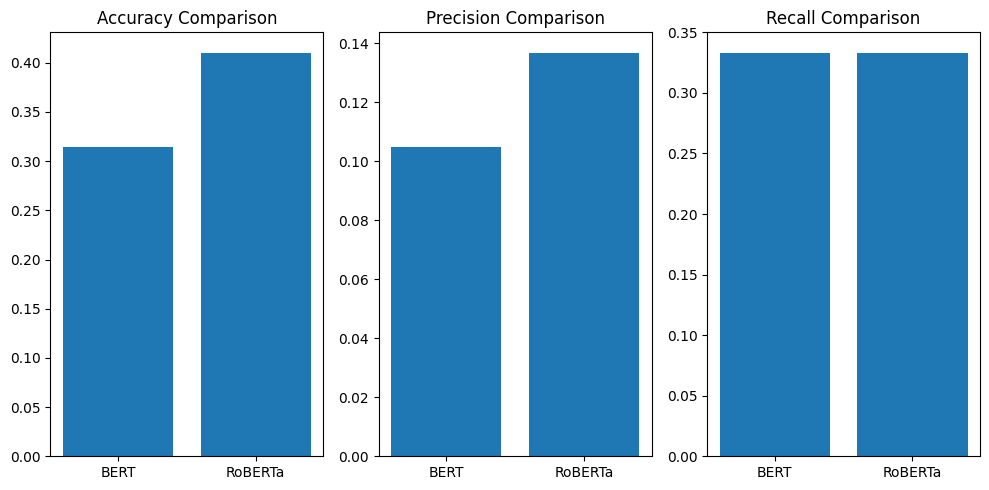

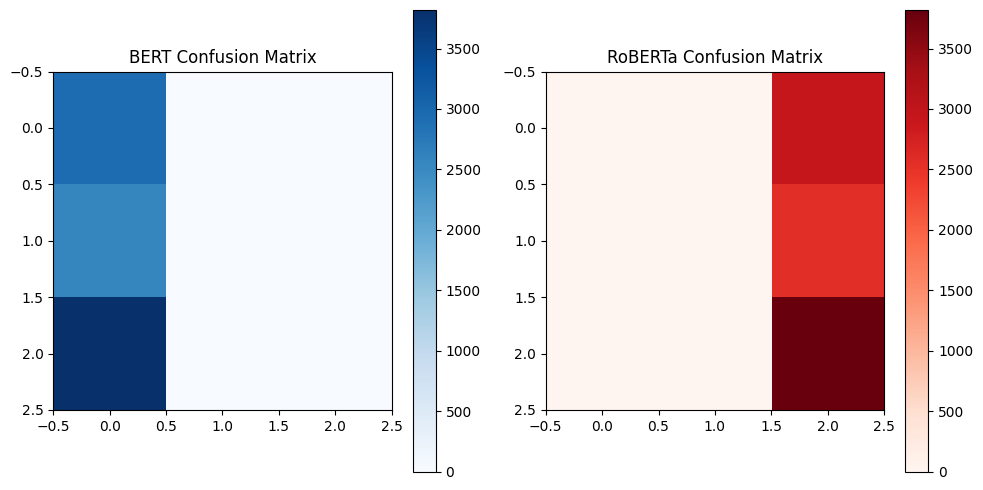

In [38]:
import numpy as np

# Calculate metrics for model comparison
bert_accuracy = accuracy_score(val_labels, bert_predictions)
roberta_accuracy = accuracy_score(val_labels, roberta_predictions)

bert_precision = precision_score(val_labels, bert_predictions, average='macro')
roberta_precision = precision_score(val_labels, roberta_predictions, average='macro')

bert_recall = recall_score(val_labels, bert_predictions, average='macro')
roberta_recall = recall_score(val_labels, roberta_predictions, average='macro')

bert_conf_matrix = confusion_matrix(val_labels, bert_predictions)
roberta_conf_matrix = confusion_matrix(val_labels, roberta_predictions)

import matplotlib.pyplot as plt

models = ['BERT', 'RoBERTa']
accuracy_scores = [bert_accuracy, roberta_accuracy]
precision_scores = [bert_precision, roberta_precision]
recall_scores = [bert_recall, roberta_recall]

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.bar(models, accuracy_scores)
plt.title('Accuracy Comparison')

plt.subplot(1, 3, 2)
plt.bar(models, precision_scores)
plt.title('Precision Comparison')

plt.subplot(1, 3, 3)
plt.bar(models, recall_scores)
plt.title('Recall Comparison')

plt.tight_layout()
plt.show()

# Plot confusion matrices
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(bert_conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('BERT Confusion Matrix')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(roberta_conf_matrix, interpolation='nearest', cmap=plt.cm.Reds)
plt.title('RoBERTa Confusion Matrix')
plt.colorbar()

plt.tight_layout()
plt.show()

## RoBERTa Accuracy is better than BERT Model